In [27]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'e0104d5e-c994-4079-9743-463f64249a0b',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-11-05T07:22:57.161Z', 'error_code': 0, 'error_message': None, 'elapsed': 25, 'credit_count': 1, 'notice': None, 'total_count': 9909}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11793, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [29]:
type(data)

dict

In [4]:
import pandas as pd

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [8]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11793,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.977790e+07,1.977790e+07,False,NaN,1,NaN,NaN,None,2024-11-05T06:45:00.000Z,68653.674282,4.147653e+10,24.0300,0.280805,-0.412837,-3.482574,10.742960,21.905191,20.629627,1.357826e+12,60.7174,1.441727e+12,None,2024-11-05T06:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-05 09:47:42.056180
1,1027,Ethereum,ETH,ethereum,9476,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204170e+08,1.204170e+08,True,NaN,2,NaN,NaN,None,2024-11-05T06:45:00.000Z,2424.907396,1.773774e+10,20.4225,-0.095472,-1.836236,-7.333669,0.261512,2.071387,-3.270866,2.920001e+11,13.0573,2.920001e+11,None,2024-11-05T06:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-05 09:47:42.056180
2,825,Tether USDt,USDT,tether,102323,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.204966e+11,1.223379e+11,True,NaN,3,NaN,NaN,None,2024-11-05T06:45:00.000Z,0.999367,6.527959e+10,19.0304,-0.025349,0.009617,0.025411,-0.058300,-0.047254,-0.156443,1.204204e+11,5.3757,1.222605e+11,None,2024-11-05T06:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-05 09:47:42.056180
3,1839,BNB,BNB,bnb,2273,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440997e+08,1.440997e+08,False,NaN,4,NaN,NaN,None,2024-11-05T06:45:00.000Z,558.371337,1.605302e+09,3.2902,0.077177,-0.325331,-7.590871,-0.922372,10.485412,13.240260,8.046117e+10,3.5919,8.046117e+10,None,2024-11-05T06:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-05 09:47:42.056180
4,5426,Solana,SOL,solana,776,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.709159e+08,5.878111e+08,True,NaN,5,NaN,NaN,None,2024-11-05T06:45:00.000Z,160.401238,2.871854e+09,12.7470,0.014201,-0.833952,-10.935726,11.945869,23.223497,4.896896,7.553549e+10,3.3775,9.428563e+10,None,2024-11-05T06:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-05 09:47:42.056180
5,3408,USDC,USDC,usd-coin,22828,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.507990e+10,3.507990e+10,False,NaN,6,NaN,NaN,None,2024-11-05T06:44:00.000Z,1.000050,7.048770e+09,25.5887,-0.022541,-0.008143,-0.005753,0.000540,0.007603,-0.002061,3.508165e+10,1.5687,3.508165e+10,None,2024-11-05T06:44:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-05 09:47:42.056180
6,52,XRP,XRP,xrp,1413,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.686866e+10,9.998704e+10,False,NaN,7,NaN,NaN,None,2024-11-05T06:45:00.000Z,0.508649,1.001804e+09,9.7076,0.151645,0.867399,-2.761354,-4.384980,-6.287799,-0.914914,2.892616e+10,1.2935,5.086486e+10,None,2024-11-05T06:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-05 09:47:42.056180
7,74,Dogecoin,DOGE,dogecoin,1090,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.466609e+11,1.466609e+11,True,NaN,8,NaN,NaN,None,2024-11-05T06:45:00.000Z,0.167266,2.993307e+09,46.5298,2.399161,10.539196,1.854968,53.567061,69.663360,69.431328,2.453142e+10,1.0970,2.453142e+10,None,2024-11-05T06:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-05 09:47:42.056180
8,1958,TRON,TRX,tron,1061,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.644590e+10,8.644

In [33]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'e0104d5e-c994-4079-9743-463f64249a0b',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2,df_append])

    if not os.path.isfile(r'C:\Users\Leon\Documents\Data Analyst Projects\API Pull Results\API.csv'):
        df.to_csv(r'C:\Users\Leon\Documents\Data Analyst Projects\API Pull Results\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Leon\Documents\Data Analyst Projects\API Pull Results\API.csv', mode='a', header=False)
        
    df = pd.read_csv(r'C:\Users\Leon\Documents\Data Analyst Projects\API Pull Results\API.csv')


In [35]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60)
exit()

{'status': {'timestamp': '2024-11-05T07:24:04.913Z', 'error_code': 0, 'error_message': None, 'elapsed': 41, 'credit_count': 1, 'notice': None, 'total_count': 9909}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11793, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [37]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11793,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.977793e+07,1.977793e+07,False,NaN,1,NaN,NaN,NaN,2024-11-05T07:21:00.000Z,68664.676574,4.155326e+10,24.1811,0.103740,-0.417359,-3.222374,10.743181,22.795731,21.178101,1.358045e+12,59.3561,1.441958e+12,NaN,2024-11-05T07:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-05 10:24:07.233580
1,1,1027,Ethereum,ETH,ethereum,9476,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204170e+08,1.204170e+08,True,NaN,2,NaN,NaN,NaN,2024-11-05T07:21:00.000Z,2426.307549,1.774839e+10,20.8272,-0.008293,-1.862902,-7.118966,0.280912,3.214500,-2.607969,2.921687e+11,12.7698,2.921687e+11,NaN,2024-11-05T07:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-05 10:24:07.233580
2,2,825,Tether USDt,USDT,tether,102323,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.204966e+11,1.223379e+11,True,NaN,3,NaN,NaN,NaN,2024-11-05T07:21:00.000Z,0.999534,6.547372e+10,19.3433,0.011687,0.023840,0.041811,-0.048110,-0.032361,-0.137882,1.204405e+11,5.2641,1.222809e+11,NaN,2024-11-05T07:21:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-05 10:24:07.233580
3,3,1839,BNB,BNB,bnb,2273,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.440997e+08,1.440997e+08,False,NaN,4,NaN,NaN,NaN,2024-11-05T07:21:00.000Z,558.683224,1.598315e+09,2.4957,0.058287,-0.273218,-7.562934,-0.741728,11.036073,13.970064,8.050611e+10,3.5187,8.050611e+10,NaN,2024-11-05T07:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-05 10:24:07.233580
4,4,5426,Solana,SOL,solana,776,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.709156e+08,5.878110e+08,True,NaN,5,NaN,NaN,NaN,2024-11-05T07:21:00.000Z,161.292921,2.872520e+09,12.6114,0.706398,-0.571767,-10.200070,12.513714,25.086045,6.484062,7.595535e+10,3.3895,9.480975e+10,NaN,2024-11-05T07:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-05 10:24:07.233580
5,5,3408,USDC,USDC,usd-coin,22828,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.508080e+10,3.508080e+10,False,NaN,6,NaN,NaN,NaN,2024-11-05T07:20:00.000Z,0.999979,7.026981e+09,25.5355,-0.024730,0.007862,0.007528,-0.013793,-0.028698,-0.009846,3.508006e+10,1.5336,3.508006e+10,NaN,2024-11-05T07:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-05 10:24:07.233580
6,6,52,XRP,XRP,xrp,1413,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.686866e+10,9.998704e+10,False,NaN,7,NaN,NaN,NaN,2024-11-05T07:21:00.000Z,0.511501,9.935811e+08,6.1015,0.631341,0.961472,-2.510684,-3.780285,-5.389446,0.130457,2.908839e+10,1.2717,5.115012e+10,NaN,2024-11-05T07:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-05 10:24:07.233580
7,7,74,Dogecoin,DOGE,dogecoin,1090,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.466612e+11,1.466612e+11,True,NaN,8,NaN,NaN,NaN,2024-11-05T07:21:00.000Z,0.167064,3.093019e+09,51.6749,0.118806,9.932035,1.992114,53.450739,70.113411,69.868617,2.450183e+10,1.0712,2.450183e+10,NaN,2024-11-05T07:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-05 10:24:07.233580
8,8,1958,TRON,TRX,tron,1061,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,8.644578

In [6]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [10]:
df = pd.read_csv(r'C:\Users\Leon\Documents\Data Analyst Projects\API Pull Results\API.csv')
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11793,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19777928.00000,19777928.00000,False,NaN,1,NaN,NaN,NaN,2024-11-05T07:21:00.000Z,68664.67657,41553262140.50738,24.18110,0.10374,-0.41736,-3.22237,10.74318,22.79573,21.17810,1358045029425.88989,59.35610,1441958208056.15991,NaN,2024-11-05T07:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-05 10:24:07.233580
1,1,1027,Ethereum,ETH,ethereum,9476,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120416991.19355,120416991.19355,True,NaN,2,NaN,NaN,NaN,2024-11-05T07:21:00.000Z,2426.30755,17748393687.97906,20.82720,-0.00829,-1.86290,-7.11897,0.28091,3.21450,-2.60797,292168654725.37518,12.76980,292168654725.38000,NaN,2024-11-05T07:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-05 10:24:07.233580
2,2,825,Tether USDt,USDT,tether,102323,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,120496629333.27373,122337925859.00560,True,NaN,3,NaN,NaN,NaN,2024-11-05T07:21:00.000Z,0.99953,65473724383.89120,19.34330,0.01169,0.02384,0.04181,-0.04811,-0.03236,-0.13788,120440463354.93604,5.26410,122280901614.16000,NaN,2024-11-05T07:21:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-05 10:24:07.233580
3,3,1839,BNB,BNB,bnb,2273,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,144099747.80912,144099747.80912,False,NaN,4,NaN,NaN,NaN,2024-11-05T07:21:00.000Z,558.68322,1598314847.19023,2.49570,0.05829,-0.27322,-7.56293,-0.74173,11.03607,13.97006,80506111651.97899,3.51870,80506111651.98000,NaN,2024-11-05T07:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-05 10:24:07.233580
4,4,5426,Solana,SOL,solana,776,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,470915558.55245,587810996.02365,True,NaN,5,NaN,NaN,NaN,2024-11-05T07:21:00.000Z,161.29292,2872519541.79028,12.61140,0.70640,-0.57177,-10.20007,12.51371,25.08604,6.48406,75955346161.34006,3.38950,94809752766.85001,NaN,2024-11-05T07:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-05 10:24:07.233580
5,5,3408,USDC,USDC,usd-coin,22828,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,35080803394.03026,35080803394.03026,False,NaN,6,NaN,NaN,NaN,2024-11-05T07:20:00.000Z,0.99998,7026980655.80759,25.53550,-0.02473,0.00786,0.00753,-0.01379,-0.02870,-0.00985,35080055939.19090,1.53360,35080055939.19000,NaN,2024-11-05T07:20:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-05 10:24:07.233580
6,6,52,XRP,XRP,xrp,1413,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,56868662755.00000,99987041380.00000,False,NaN,7,NaN,NaN,NaN,2024-11-05T07:21:00.000Z,0.51150,993581090.10545,6.10150,0.63134,0.96147,-2.51068,-3.78029,-5.38945,0.13046,29088388179.64496,1.27170,51150118132.66000,NaN,2024-11-05T07:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-05 10:24:07.233580
7,7,74,Dogecoin,DOGE,dogecoin,1090,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,146661236383.70523,146661236383.70523,True,NaN,8,NaN,NaN,NaN,2024-11-05T07:21:00.000Z,0.16706,3093019115.03573,51.67490,0.11881,9.93204,1.99211,53.45074,70.11341,69.86862,24501827504.94082,1.07120,24501827504.94000,NaN,2024-11-05T07:21:00.000Z,

In [12]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.02235,-0.42370,-3.36945,10.68040,23.51248,20.93207
Ethereum,-0.06198,-1.90956,-7.28752,0.20092,3.88126,-2.95129
Tether USDt,0.00199,0.01447,0.03488,-0.04857,-0.03520,-0.12036
BNB,-0.00460,-0.28671,-7.65894,-0.78966,11.67467,13.94943
Solana,0.67894,-0.54559,-10.30948,12.54678,25.86327,6.37434
USDC,-0.00142,0.00663,0.01517,0.00518,0.00368,-0.00209
XRP,0.78909,1.18602,-2.51165,-3.57322,-4.57071,0.15222
Dogecoin,0.35052,10.11093,1.92578,53.64713,70.82835,70.14261
TRON,-0.10601,-1.64210,-1.07064,5.85472,8.65802,31.08246


In [14]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.02235
              quote.USD.percent_change_24h    -0.42370
              quote.USD.percent_change_7d     -3.36945
              quote.USD.percent_change_30d    10.68040
              quote.USD.percent_change_60d    23.51248
              quote.USD.percent_change_90d    20.93207
Ethereum      quote.USD.percent_change_1h     -0.06198
              quote.USD.percent_change_24h    -1.90956
              quote.USD.percent_change_7d     -7.28752
              quote.USD.percent_change_30d     0.20092
              quote.USD.percent_change_60d     3.88126
              quote.USD.percent_change_90d    -2.95129
Tether USDt   quote.USD.percent_change_1h      0.00199
              quote.USD.percent_change_24h     0.01447
              quote.USD.percent_change_7d      0.03488
              quote.USD.percent_change_30d    -0.04857
              quote.USD.percent_change_60d    -0.03520
              quote.US

In [20]:
type(df4)

pandas.core.series.Series

In [22]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.02235
             quote.USD.percent_change_24h  -0.42370
             quote.USD.percent_change_7d   -3.36945
             quote.USD.percent_change_30d  10.68040
             quote.USD.percent_change_60d  23.51248
             quote.USD.percent_change_90d  20.93207
Ethereum     quote.USD.percent_change_1h   -0.06198
             quote.USD.percent_change_24h  -1.90956
             quote.USD.percent_change_7d   -7.28752
             quote.USD.percent_change_30d   0.20092
             quote.USD.percent_change_60d   3.88126
             quote.USD.percent_change_90d  -2.95129
Tether USDt  quote.USD.percent_change_1h    0.00199
             quote.USD.percent_change_24h   0.01447
             quote.USD.percent_change_7d    0.03488
             quote.USD.percent_change_30d  -0.04857
             quote.USD.percent_change_60d  -0.03520
             quote.USD.percent_change_90d  -0.12036
BNB          quote.USD.percent_change_1h   -0.00460
             quote.USD.percent_change_24h  -0.28671
             quote.USD.percent_change_7d   -7.65894
             quote.USD.percent_change_30d  -0.78966
             quote.USD.percent_change_60d  11.67467
             quote.USD.percent_change_90d  13.94943
Solana       quote.USD.percent_change_1h    0.67894
             quote.USD.percent_change_24h  -0.54559
             quote.USD.percent_change_7d  -10.30948
             quote.USD.percent_change_30d  12.54678
             quote.USD.percent_change_60d  25.86327
             quote.USD.percent_change_90d   6.37434
USDC         quote.USD.percent_change_1h   -0.00142
             quote.USD.percent_change_24h   0.00663
             quote.USD.percent_change_7d    0.01517
             quote.USD.percent_change_30d   0.00518
             quote.USD.percent_change_60d   0.00368
             quote.USD.percent_change_90d  -0.00209
XRP          quote.USD.percent_change_1h    0.78909
             quote.USD.percent_change_24h   1.18602
             quote.USD.percent_change_7d   -2.51165
             quote.USD.percent_change_30d  -3.57322
             quote.USD.percent_change_60d  -4.57071
             quote.USD.percent_change_90d   0.15222
Dogecoin     quote.USD.percent_change_1h    0.35052
             quote.USD.percent_change_24h  10.11093
             quote.USD.percent_change_7d    1.92578
             quote.USD.percent_change_30d  53.64713
             quote.USD.percent_change_60d  70.82835
             quote.USD.percent_change_90d  70.14261
TRON         quote.USD.percent_change_1h   -0.10601
             quote.USD.percent_change_24h  -1.64210
             quote.USD.percent_change_7d   -1.07064
             quote.USD.percent_change_30d   5.85472
             quote.USD.percent_change_60d   8.65802
             quote.USD.percent_change_90d  31.08246
Toncoin      quote.USD.percent_change_1h   -0.00416
             quote.USD.percent_change_24h  -5.65193
             quote.USD.percent_change_7d   -8.48608
             quote.USD.percent_change_30d -11.42506
             quote.USD.percent_change_60d  -4.71933
             quote.USD.percent_change_90d -19.91955
Cardano      quote.USD.percent_change_1h   -0.01196
             quote.USD.percent_change_24h  -0.83525
             quote.USD.percent_change_7d   -4.64925
             quote.USD.percent_change_30d  -5.65789
             quote.USD.percent_change_60d   2.90715
             quote.USD.percent_change_90d  -1.25026
Shiba Inu    quote.USD.percent_change_1h    0.23823
             quote.USD.percent_change_24h   3.71225
             quote.USD.percent_change_7d   -3.98151
             quote.USD.percent_change_30d   0.90666
             quote.USD.percent_change_60d  32.49602
             quote.USD.percent_change_90d  28.85195
Avalanche    quote.USD.percent_change_1h    0.04411
             quote.USD.percent_change_24h  -2.32960
             quote.USD.percent_change_7d  -13.04858
             quote.USD.percent_change_30d

In [26]:
df5.count()

values    90
dtype: int64

In [30]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.02235
1,Bitcoin,quote.USD.percent_change_24h,-0.42370
2,Bitcoin,quote.USD.percent_change_7d,-3.36945
3,Bitcoin,quote.USD.percent_change_30d,10.68040
4,Bitcoin,quote.USD.percent_change_60d,23.51248
5,Bitcoin,quote.USD.percent_change_90d,20.93207
6,Ethereum,quote.USD.percent_change_1h,-0.06198
7,Ethereum,quote.USD.percent_change_24h,-1.90956
8,Ethereum,quote.USD.percent_change_7d,-7.28752
9,Ethereum,quote.USD.percent_change_30d,0.20092


In [36]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.02235
1,Bitcoin,24h,-0.42370
2,Bitcoin,7d,-3.36945
3,Bitcoin,30d,10.68040
4,Bitcoin,60d,23.51248
5,Bitcoin,90d,20.93207
6,Ethereum,1h,-0.06198
7,Ethereum,24h,-1.90956
8,Ethereum,7d,-7.28752
9,Ethereum,30d,0.20092


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


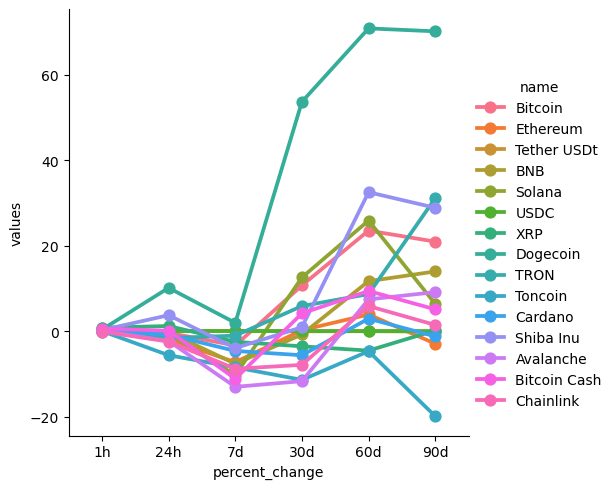

In [39]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [42]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,68664.67657,2024-11-05 10:24:07.233580
15,Bitcoin,68664.67657,2024-11-05 10:24:07.233580
30,Bitcoin,68637.85964,2024-11-05 10:25:07.989518
45,Bitcoin,68637.85964,2024-11-05 10:25:07.989518
60,Bitcoin,68637.85964,2024-11-05 10:26:09.187645
75,Bitcoin,68637.85964,2024-11-05 10:26:09.187645
90,Bitcoin,68619.31119,2024-11-05 10:27:09.913174
105,Bitcoin,68619.31119,2024-11-05 10:27:09.913174
120,Bitcoin,68592.78978,2024-11-05 10:28:10.594971
135,Bitcoin,68592.78978,2024-11-05 10:28:10.594971


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

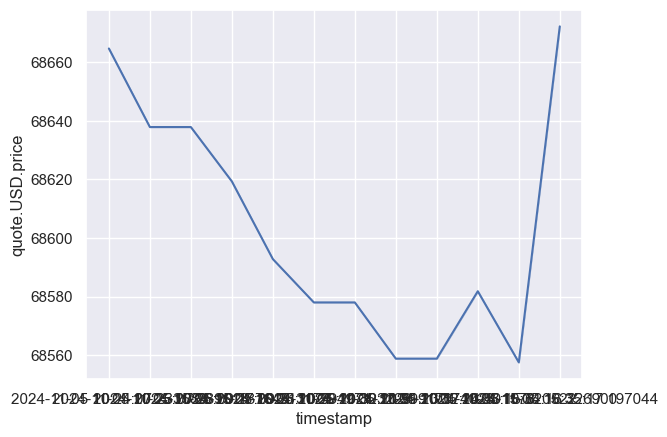

In [44]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)